<a href="https://colab.research.google.com/github/tuliofalmeida/pyjama/blob/main/PyJama_JAMA_exemple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PyJama - Python for Joint Angle Measurement Acquisition Library
##JAMA example

Joint angle measure using PyJama and JAMA

This notebook uses an open source project [tuliofalmeida/pyjama](https://pypi.org/project/pyjamalib/) to estimate knee angle using IMU data and video.

In this notebook we use [JAMA - Joint Angle Measurement Acquisition Device]((https://github.com/tuliofalmeida/jama)), an open access hardware for measuring joint angles. We attached JAMA to the [Lokomat](https://www.hocoma.com/solutions/lokomat/), in order to validate the developed device and the PyJama. In order to compare the findings, we film and extracted the angle using the [Kinovea](https://www.kinovea.org/) software.

JAMA aquisition parameters:
*   Frequency: 75 Hz
*   Aquisition duration: 120s

Lokomat parameters: 
*   Min knee angle = 0°
*   Max knee angle = 60°
*   Velocity = 1 km/h

Video details: 
*   Duration: 00:02:58
*   FPS: 30

For other examples and details about the library, visit [Pyjama GitHub](https://github.com/tuliofalmeida/pyjama).

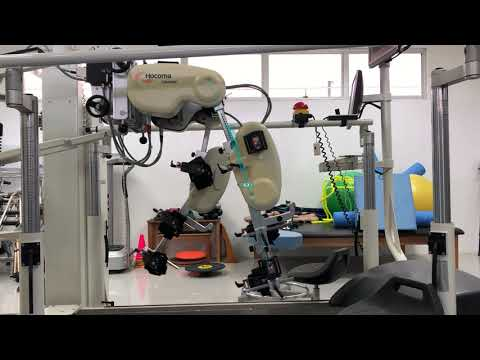

In [1]:
#@title Video of the lokomat with the sensors
from IPython.display import YouTubeVideo
YouTubeVideo('sve4TcuJmSk',width=640, height=480)

## Install PyJama

In [2]:
!pip install pyjamalib

     |████████████████████████████████| 71kB 4.7MB/s 


## Import the libraries

In [3]:
import pyjamalib as pjl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%load_ext google.colab.data_table

## Load the data

In [4]:
!git clone https://github.com/tuliofalmeida/pyjama

Cloning into 'pyjama'...
remote: Enumerating objects: 577, done.
remote: Counting objects: 100% (577/577), done.
remote: Compressing objects: 100% (455/455), done.
remote: Total 577 (delta 318), reused 251 (delta 91), pack-reused 0
Receiving objects: 100% (577/577), 34.85 MiB | 10.87 MiB/s, done.
Resolving deltas: 100% (318/318), done.


In [5]:
#Lokomat data
path = '/content/pyjama/docs/lokomat/lokomat_data.txt'
data = pjl.DataHandler.import_raw_data(path)

#Lokomat calibration data
path_calib = '/content/pyjama/docs/lokomat/lokomat_data_calibration.txt'
data_calib = pjl.DataHandler.import_raw_data(path_calib)

#Video data from Kinovea
kinovea = pd.read_csv('/content/pyjama/docs/lokomat/knee_angle_kinovea.csv',delimiter=';')

In [6]:
#@title Input data example 
print('Data Lokomat: ',data[5][:300],'\n')
print('Data Lokomat Calibration: ',data_calib[5][:300],'\n')
print('Data Kinovea: ',kinovea[:5])

Data Lokomat:  1,-0.023,0.047,0.973,0,6.248,0.385,333.960,-571.320,1503.280;2,-0.023,0.059,0.965,-0.123,6.090,-0.289,334.880,-567.640,1507.880;3,-0.020,0.051,0.949,0.341,6.099,0.236,326.600,-573.160,1506.960;4,-0.027,0.055,0.941,-1.041,5.478,-0.140,327.520,-569.480,1502.360;5,-0.027,0.047,0.953,0.070,5.784,-0.158, 

Data Lokomat Calibration:  1,0.980,0.012,-0.047,11.629,19.504,17.570,179.400,2.760,315.560;2,1.043,-0.133,-0.125,23.126,-2.581,13.983,178.480,8.280,313.720;3,1.086,-0.035,-0.145,22.181,-4.909,-0.009,179.400,7.360,315.560;4,1.008,-0.027,-0.211,0.070,-7.945,-0.551,180.320,11.040,315.560;5,1.008,-0.027,-0.254,-7.490,-3.588,13.00 

Data Kinovea:     Time (ms)        Knee Angle
0          0  5,05740165710449
1         33  5,09946489334106
2         67   5,1323094367981
3        100  5,15325403213501
4        133  5,16673707962036


In [7]:
#Separating the data from the sensor positioned on the 'thigh'
thigh_data = pjl.DataHandler.split_raw_data(data[6])
thigh_calibration = pjl.DataHandler.split_raw_data(data_calib[6])

#Separating the data from the sensor positioned on the 'shin'
shin_data = pjl.DataHandler.split_raw_data(data[5])
shin_calibration = pjl.DataHandler.split_raw_data(data_calib[5])

## Performing data processing. The 'toDataFrame' function performs the filtering of the data and saves it in a pandas data frame.

In [8]:
#Processing 'thigh' JAMA data
#The data was cut [500:] due to the equipment being stopped to adjust the equipment and adjust the filter delay.
thigh_df = pjl.DataAnalysis.all_filters(thigh_data[500:],
                                        thigh_calibration,
                                        beta=1,
                                        alpha=0.04,
                                        beta_mad2=.6,
                                        low_pass=.04,
                                        gyr_filt_cf=.4,
                                        gyr_filt_k=.04,
                                        euler = False,
                                        cf = False)

thigh_df.head()

Time     Acc_X     Acc_Y  ...  Madgwick_Roll  Madgwick_Pitch  Madgwick_Yaw
0  0.000000 -0.004704  0.998939  ...     123.171592       -1.219836    162.871759
1  0.013333  0.002296  0.994939  ...     122.678397       -1.165518    162.723723
2  0.026667 -0.000704  0.994939  ...     122.151058       -1.130725    162.631404
3  0.040000 -0.004704  1.006939  ...     121.617757       -1.089918    162.532097
4  0.053333  0.002296  0.998939  ...     121.113984       -1.048268    162.399176

[5 rows x 34 columns]

In [9]:
#Processing 'shin' JAMA data
#The data was cut [500:] due to the equipment being stopped to adjust the equipment and adjust the filter delay. 
shin_df = pjl.DataAnalysis.all_filters(shin_data[500:],
                                       shin_calibration,
                                       beta=1,
                                       alpha=0.04,
                                       beta_mad2=.6,
                                       low_pass=.04,
                                       gyr_filt_cf=.4,
                                       gyr_filt_k=.04,
                                       euler = False,
                                       cf = False)

shin_df.head()

Time     Acc_X     Acc_Y  ...  Madgwick_Roll  Madgwick_Pitch  Madgwick_Yaw
0  0.000000  0.007029  1.008011  ...      93.202450       -0.959851     79.644378
1  0.013333  0.003029  1.000011  ...      92.431073       -0.829464     80.046818
2  0.026667  0.003029  1.012011  ...      91.723147       -0.648496     80.595722
3  0.040000  0.003029  1.012011  ...      90.978289       -0.539187     80.946798
4  0.053333  0.007029  0.992011  ...      90.224014       -0.481698     81.407419

[5 rows x 34 columns]

In [10]:
#Processing the video data
data_kinovea = np.asarray([float(kinovea['Knee Angle'][i].replace(',', '.')) for i in range(len(kinovea['Knee Angle']))])
time_kinovea = np.arange(0, len(data_kinovea)/30, 1/30)

## The 'joint_angle' function merges the data, extracts statistical metrics and saves them in a pandas data frame.

In [11]:
#The data was cut [init=1500] due to filters and gait patterns. 
knee_angle,knee_metrics = pjl.DataAnalysis.joint_measures(thigh_df,
                                                          shin_df,
                                                          patternRoll=True,
                                                          init=1500,
                                                          euler = False,
                                                          cf = False)                                                         

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [12]:
#@title Knee joint data from JAMA { vertical-output: true }
knee_angle

Time  Flex/Ext_CF_GD  ...  Flex/Ext_Kalman_GN  Flex/Ext_Madgwick
1500   20.000000       59.411717  ...           61.378274          57.267847
1501   20.013333       58.225739  ...           61.903510          56.341849
1502   20.026667       57.106793  ...           62.381075          55.332054
1503   20.040000       55.891478  ...           62.784804          54.638865
1504   20.053333       54.661032  ...           63.145107          53.568399
...          ...             ...  ...                 ...                ...
8495  113.266667       67.451282  ...           53.022656          62.423175
8496  113.280000       66.689507  ...           54.093943          62.146210
8497  113.293333       65.808101  ...           55.091084          61.581362
8498  113.306667       64.839880  ...           56.009355          60.943902
8499  113.320000       63.801842  ...           56.860328          60.205335

[7000 rows x 6 columns]

In [13]:
knee_rom = pjl.DataAnalysis.joint_rom(knee_angle)

In [14]:
#@title Knee Range of Motion from JAMA
knee_rom.head()

Angles
Flex/Ext_CF_GD      72.775853
Flex/Ext_CF_GN      73.576673
Flex/Ext_Kalman_GD  70.907296
Flex/Ext_Kalman_GN  69.144001
Flex/Ext_Madgwick   65.925118

In [15]:
#@title Knee metrics from JAMA
knee_metrics

Movement        Rom       Mean  ...        Max   Min Est    Max Est
0      Flex/Ext_CF_GD  72.775853  60.886084  ...  72.775853  6.003563  63.539634
1      Flex/Ext_CF_GN  73.576673  61.565557  ...  73.576673  5.319982  63.609169
2  Flex/Ext_Kalman_GD  70.907296  58.808791  ...  70.907296  7.358088  63.600011
3  Flex/Ext_Kalman_GN  69.144001  56.806202  ...  69.144001  6.116024  61.713590
4   Flex/Ext_Madgwick  69.144001  58.281918  ...  69.144001  4.482209  58.575906

[5 rows x 10 columns]

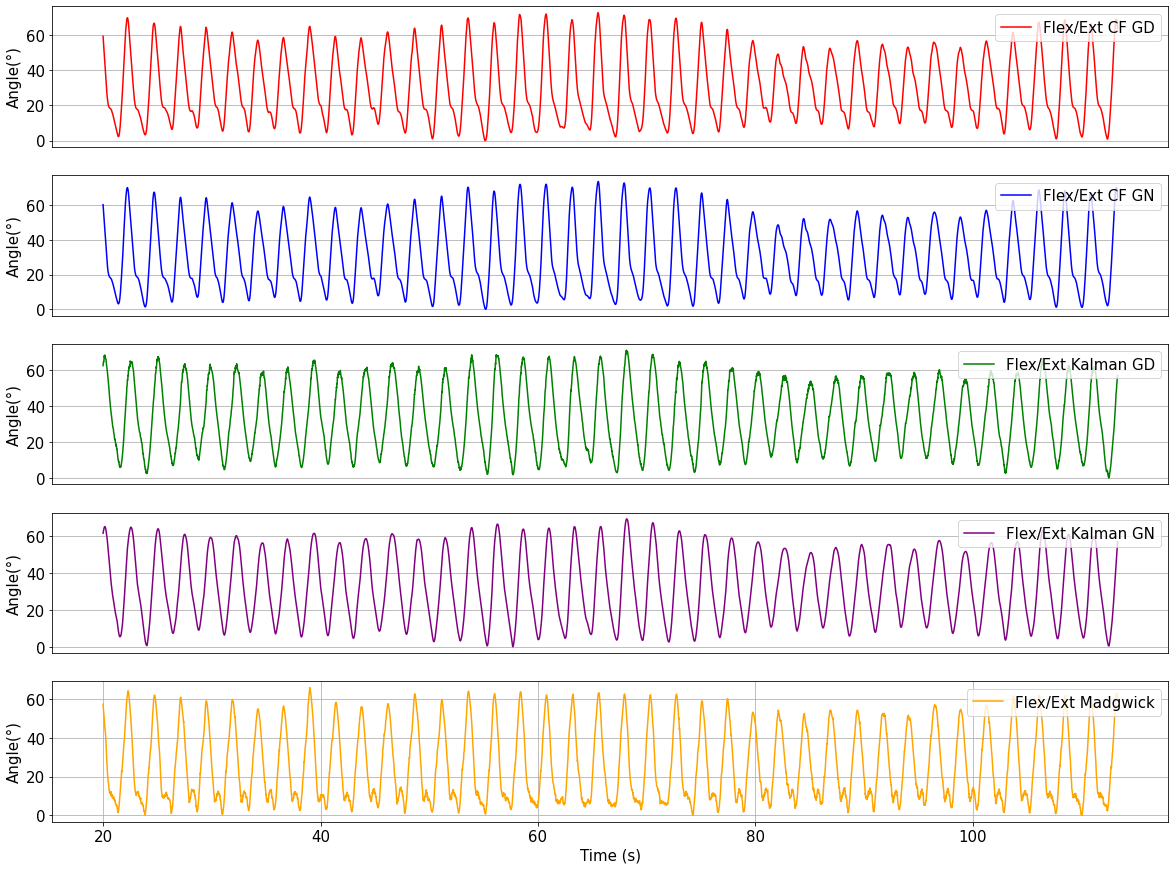

In [25]:
#@title Knee angle plots from JAMA
plt.figure(figsize=(20,15))
tfont = {'fontname':'Times New Roman'}

plt.subplot(5, 1, 1)
plt.plot(knee_angle['Time'], knee_angle['Flex/Ext_CF_GD'], 'r')
# plt.title('Experimento 1 - Ângulo Articular', fontsize = 20,**tfont)
plt.ylabel('Angle(°)', fontsize=15,**tfont)
plt.xticks([], [])
plt.yticks(fontsize = 15,**tfont)
plt.legend(['Flex/Ext CF GD'], fontsize = 15 , loc='upper right')
plt.grid()

plt.subplot(5, 1, 2)
plt.plot(knee_angle['Time'], knee_angle['Flex/Ext_CF_GN'], 'b')
plt.ylabel('Angle(°)', fontsize=15,**tfont)
plt.yticks(fontsize = 15,**tfont)
plt.xticks([], [])
plt.legend(['Flex/Ext CF GN'], fontsize = 15 , loc='upper right')
plt.grid()

plt.subplot(5, 1, 3)
plt.plot(knee_angle['Time'], knee_angle['Flex/Ext_Kalman_GD'], 'g')
plt.ylabel('Angle(°)', fontsize=15,**tfont)
plt.yticks(fontsize = 15,**tfont)
plt.xticks([], [])
plt.legend(['Flex/Ext Kalman GD'], fontsize = 15 , loc='upper right')
plt.grid()

plt.subplot(5, 1, 4)
plt.plot(knee_angle['Time'], knee_angle['Flex/Ext_Kalman_GN'], 'purple')
plt.ylabel('Angle(°)', fontsize=15,**tfont)
plt.yticks(fontsize = 15,**tfont)
plt.xticks([], [])
plt.legend(['Flex/Ext Kalman GN'], fontsize = 15 , loc='upper right')
plt.grid()

plt.subplot(5, 1, 5)
plt.plot(knee_angle['Time'], knee_angle['Flex/Ext_Madgwick'], 'orange')
plt.ylabel('Angle(°)', fontsize=15,**tfont)
plt.yticks(fontsize = 15,**tfont)
plt.xlabel('Time (s)',fontsize = 15,**tfont)
plt.xticks(fontsize = 15,**tfont)
plt.legend(['Flex/Ext Madgwick'], fontsize = 15 , loc='upper right')
plt.grid()

plt.show()

In [17]:
#@title Knee angle from video
kinovea.head()

Time (ms)        Knee Angle
0          0  5,05740165710449
1         33  5,09946489334106
2         67   5,1323094367981
3        100  5,15325403213501
4        133  5,16673707962036

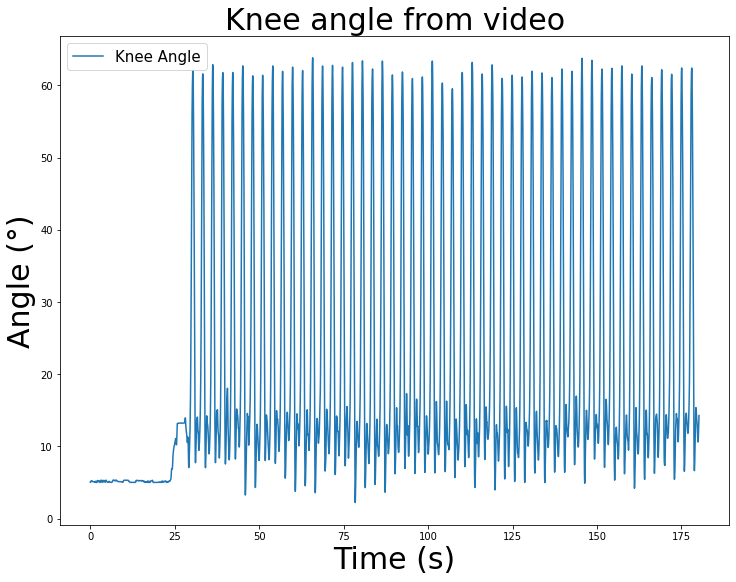

In [18]:
#@title Knee angle from video
plt.figure(figsize=(12,9))
plt.plot(time_kinovea,data_kinovea)
plt.title('Knee angle from video',fontsize = 30);
plt.legend(['Knee Angle'], fontsize = 15)
plt.ylabel('Angle (°)',fontsize = 30);
plt.xlabel('Time (s)',fontsize = 30);

## Finding the gait cycle

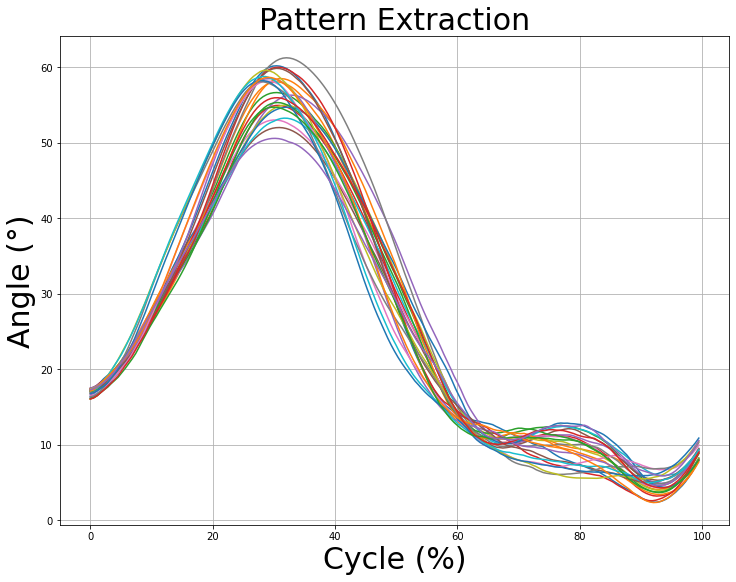

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [19]:
#Gait pattern from JAMA
jama,_ = pjl.DataProcessing.pattern_extraction(knee_angle['Flex/Ext_Madgwick'],
                                               knee_angle['Time'],
                                               threshold=17.5,
                                               plot=True,
                                               bias=1);

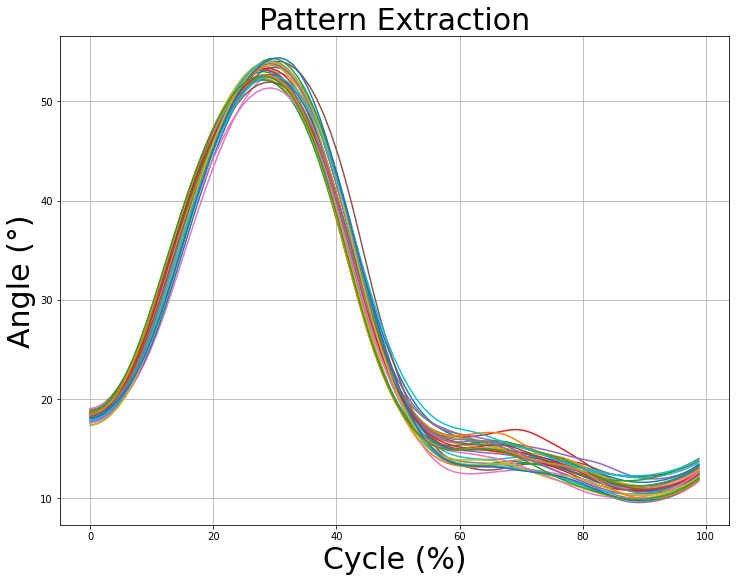

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [20]:
#Gait pattern from video
video_cycle,_ = pjl.DataProcessing.pattern_extraction(data_kinovea,
                                                      time_kinovea,
                                                      threshold=19,
                                                      plot=True,
                                                      df=False)

## Average cycles with 95% CI

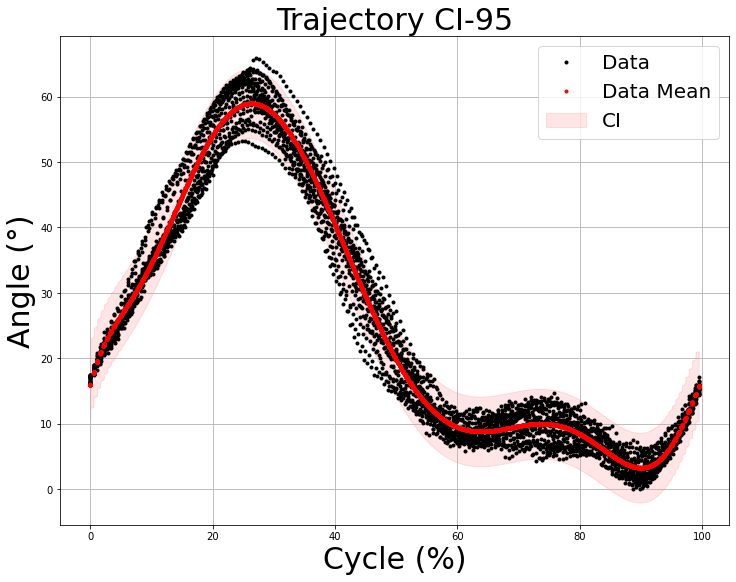

In [21]:
#JAMA average cycles
jama_pattern = pjl.DataProcessing.patternCI(jama[:,0],
                                           jama[:,1],
                                           plot=True,
                                           df=False, 
                                           poly_degree=10,
                                           label1 = 'Data',
                                           label2 = 'Data Mean')

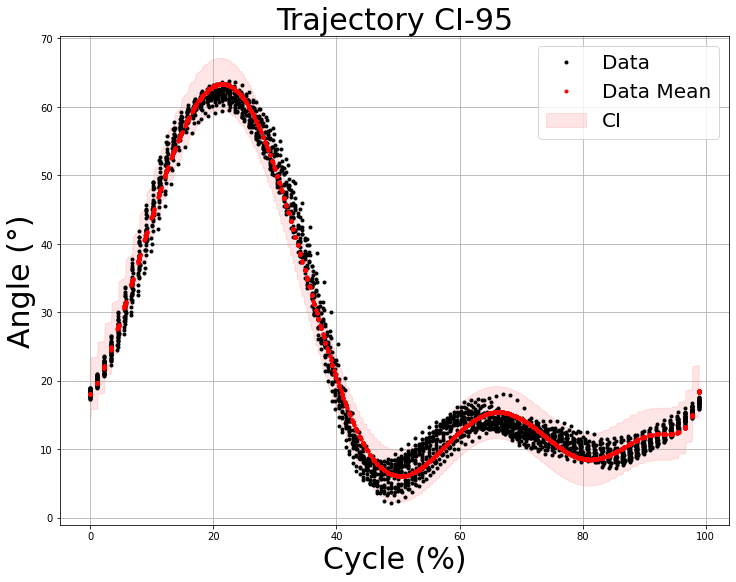

In [22]:
#Video average cycles
video_pattern = pjl.DataProcessing.patternCI(video_cycle[:,0],
                                             video_cycle[:,1],
                                             plot=True,
                                             df=False, 
                                             poly_degree=10,
                                             label1 = 'Data',
                                             label2 = 'Data Mean')

## Data comparsion: IMU x Video

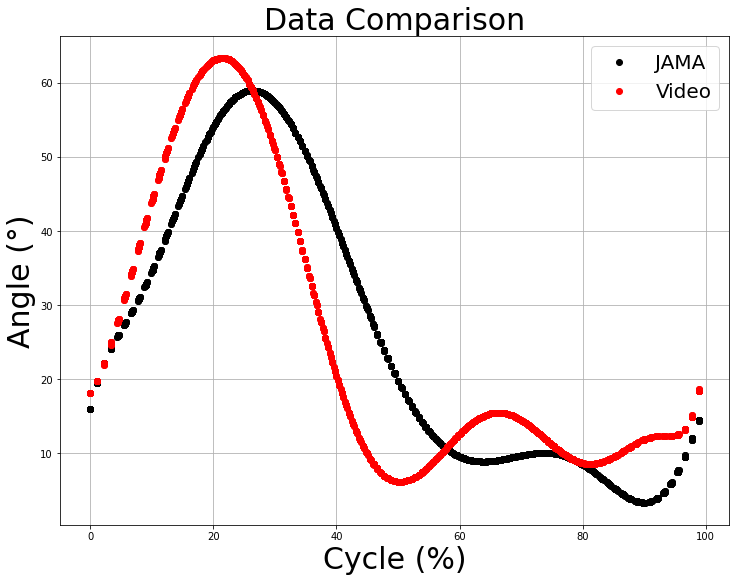

In [23]:
jama_mean,video_mean = pjl.DataProcessing.data_comparison(video_cycle,
                                                          jama_pattern,
                                                          video_pattern,
                                                          label1='JAMA',
                                                          label2='Video')